# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






* Un scatterplot permet d'afficher des points individuels sur un plan cartésien, où chaque point représente une paire de valeurs (x, y).
Utilisation : observer la relation entre deux variables quantitatives.

* Un barplot utilise des barres pour représenter des catégories et la fréquence ou une mesure associée.
Utilisation : comparer des catégories distinctes, afficher des proportions.

* Un boxplot résume la distribution d'une variable avec cinq valeurs clés : minimum, premier quartile (Q1), médiane (Q2), troisième quartile (Q3) et maximum.
Utilisation : visualiser la dispersion et comparer plusieurs distributions.

* Un violinplot combine un boxplot et une estimation de densité pour mieux représenter la distribution des données, en particulier quand la taille de l'échantillon est grande.
Utilisation : meme utilisation que pour boxplot mais permet de visualiser la forme d'une variable numérique.

* Un histogramme regroupe des valeurs numériques en intervalles (bins) et affiche leur fréquence sous forme de barres.
Utilisation : analyser la distribution d'une variable continue.

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [8]:
# from google.colab import drive
# drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
tab separated file
Chaque ligne représente un organisme. Les colonnes donnent différentes informations.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name: Nom de l'organnisme
Kingdom: Grand Groupe divisant le monde du vivant (Archaea, Bacteria, Eukaryota, or Viruses)
Group: Niveau de division inferieur au Royaume:
    Eukaryota: Animals, Fungi, Plants, Protists;
    Prokaryota: group corresponds to phylum;
    Viruses: groups defined as the first level (ranked) below the kingdom of Viruses
SubGroup: Niveau NCBI de taxonomie sous le groupe
    Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians Reptiles, Roundworms, Ascomycetes, Basidiomycetes,Land Plants, Green Algae, Apicomplexans, Kinetoplasts;
    Prokaryota: sub-groups correspond to class level;
    Viruses: sub-groups correspond to families including floating genera
Size (Mb): Taille estimée du génome en mégabase 
Chrs: Nombre de chromosome
Organelles: Nombre d'organites 
Plasmids: Nombre de plasmides (molécule d'ADN distincte de l'ADN chromosomique)
BioProjects: Nombre de projet de séquençage de génome
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
df = pd.read_csv('overview.txt', sep='\t', dtype=str)
df

,#Organism/Name,Kingdom,Group,SubGroup,Size (Mb),Chrs,Organelles,Plasmids,BioProjects
0,'Brassica napus' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.743598,-,-,-,1
1,'Catharanthus roseus' aster yellows phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.603949,1,-,1,1
2,'Chrysanthemum coronarium' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.739592,-,-,-,1
3,'Conium maculatum' witches'-broom phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.758186,-,-,-,1
4,'Cynodon dactylon' phytoplasma,Bacteria,Terrabacteria group,Mycoplasmatota,0.483935,-,-,-,1
...,...,...,...,...,...,...,...,...,...
87883,Zymoseptoria crescenta,Eukaryota,Fungi,Ascomycetes,47.0329,-,-,-,1
87884,Zymoseptoria passerinii,Eukaryota,Fungi,Ascomycetes,28.7863,-,-,-,1
87885,Zymoseptoria pseudotritici,Eukaryota,Fungi,Ascomycetes,32.0973,-,-,-,6
87886,Zymoseptoria tritici,Eukaryota,Fungi,Ascomycetes,39.6863,21,1,-,51


In [19]:
#Votre code ici
print("Il y a", len(df.index), "organismes.")

Il y a 87888 organismes.


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Un royaume est l'un des niveaux les plus élevés de classification des êtres vivants dans la hiérarchie taxonomique. Il regroupe des organismes partageant des caractéristiques fondamentales communes.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
D'apres le README, il y a 4 royaumes differents dans cette base.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

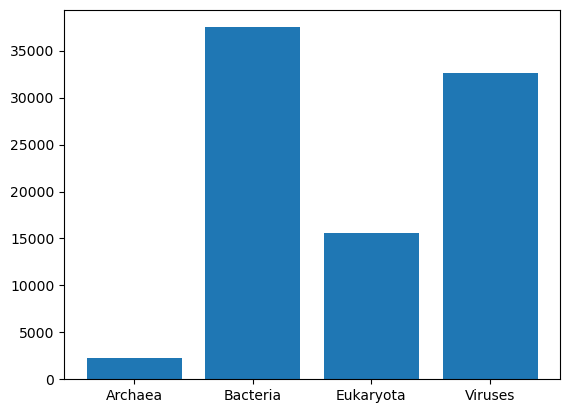

Kingdom
Archaea       2263
Bacteria     37492
Eukaryota    15560
Viruses      32573
dtype: int64

In [26]:
#Votre code ici
df2 = df.groupby('Kingdom').size()
plt.bar(df2.index, df2.values)
plt.show()
df2

In [27]:
df2.sum()

87888

### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un niveau de classification des êtres vivants dans la hiérarchie taxonomique en dessous des royaumes, les groupes regroupent des organismes partageant des caractéristiques fondamentales communes.
```

Q9. Combien de groupes sont présents par royaume ?

In [32]:
q9 = df.groupby(['Kingdom', 'Group']).size()
q9

Kingdom  Group                         
Archaea  Asgard group                        61
         Candidatus Hadarchaeota              8
         Candidatus Hydrothermarchaeota       6
         Candidatus Thermoplasmatota        432
         DPANN group                        249
                                           ... 
Viruses  dsRNA viruses                       30
         unclassified archaeal viruses       15
         unclassified phages               1233
         unclassified virophages              3
         unclassified viruses               684
Length: 61, dtype: int64

In [33]:
#Votre code ici
q9.groupby('Kingdom').size()

Kingdom
Archaea      11
Bacteria     37
Eukaryota     5
Viruses       8
dtype: int64

Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [35]:
#Votre code ici
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(q9)

Kingdom    Group                             
Archaea    Asgard group                             61
           Candidatus Hadarchaeota                   8
           Candidatus Hydrothermarchaeota            6
           Candidatus Thermoplasmatota             432
           DPANN group                             249
           Euryarchaeota                          1035
           Halobacteriota                            1
           Other                                     1
           TACK group                              408
           environmental samples                     5
           unclassified Archaea                     57
Bacteria   Acidobacteriota                         256
           Aquificota                               42
           Atribacterota                            43
           Bacteria incertae sedis                3872
           Bdellovibrionota                        122
           Caldisericota/Cryosericota group         21
           Calditri

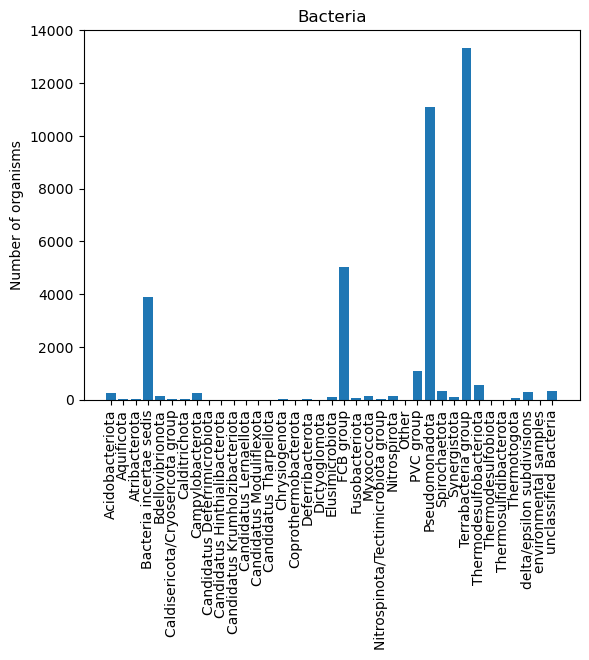

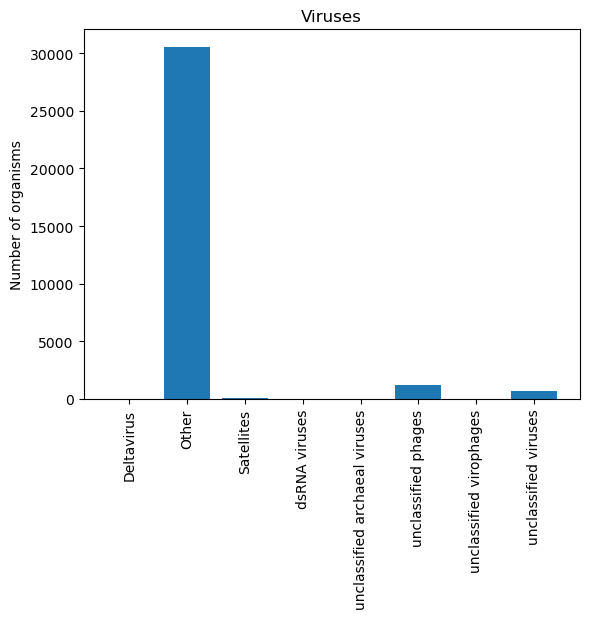

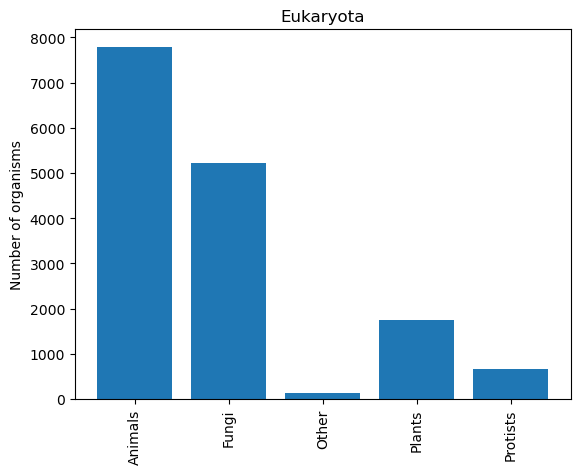

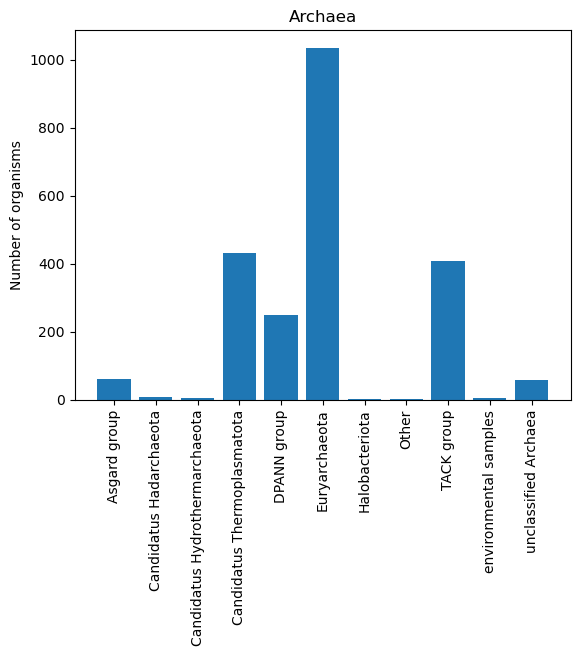

In [36]:
plt.close()
kingdoms = df["Kingdom"].unique()
for kingdom in kingdoms:
    subset = q9[kingdom]
    plt.figure()
    plt.title(kingdom)
    plt.bar(subset.index, subset.values)
    plt.xticks(rotation=90)
    plt.ylabel("Number of organisms")
plt.show()

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

In [39]:
#Votre code ici
q11 = df["Size (Mb)"]
q11

0        0.743598
1        0.603949
2        0.739592
3        0.758186
4        0.483935
           ...   
87883     47.0329
87884     28.7863
87885     32.0973
87886     39.6863
87887    0.005969
Name: Size (Mb), Length: 87888, dtype: object

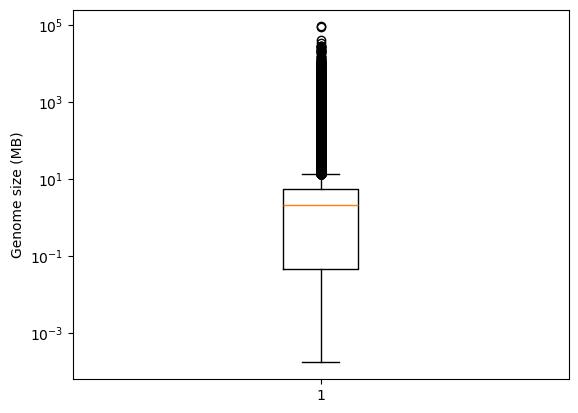

In [40]:
size = [float(e) for e in q11.values if e != "-"]

plt.close()
plt.figure()
plt.boxplot(size)
plt.yscale('log')
plt.ylabel("Genome size (MB)")
plt.show()


Q12. Affichez la distribution par royaume.

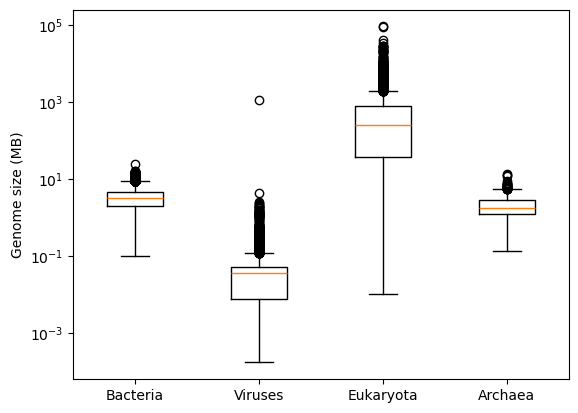

In [42]:
#Votre code ici
sizes = []
for kingdom in kingdoms:
    subset = df[df["Kingdom"] == kingdom]
    q12 = subset["Size (Mb)"]
    sizes.append([float(e) for e in q12.values if e != "-"])

plt.close()
plt.figure()
plt.boxplot(sizes, tick_labels=kingdoms)
plt.yscale('log')
plt.ylabel("Genome size (MB)")
plt.show()


Q13. Affichez la distribution par groupe pour chaque royaume.

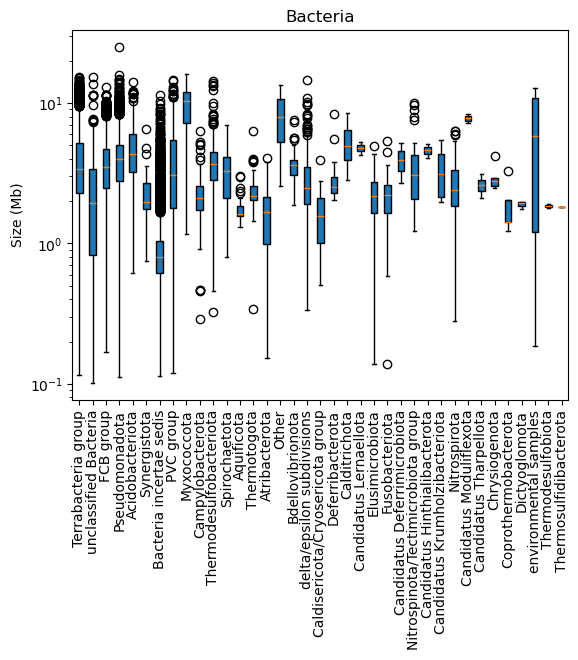

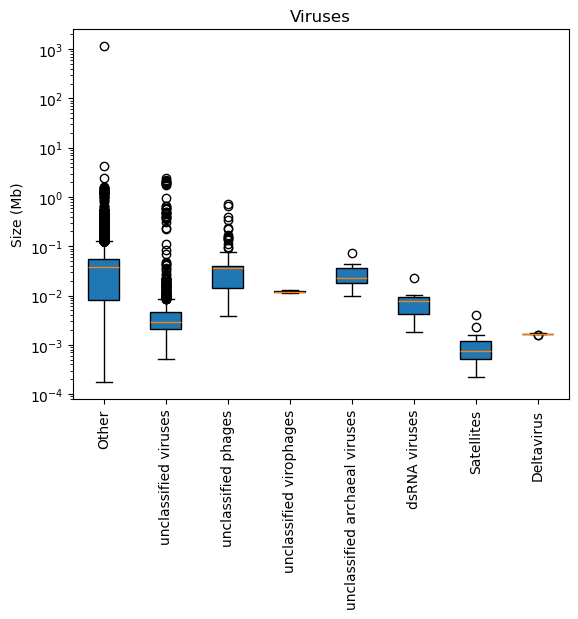

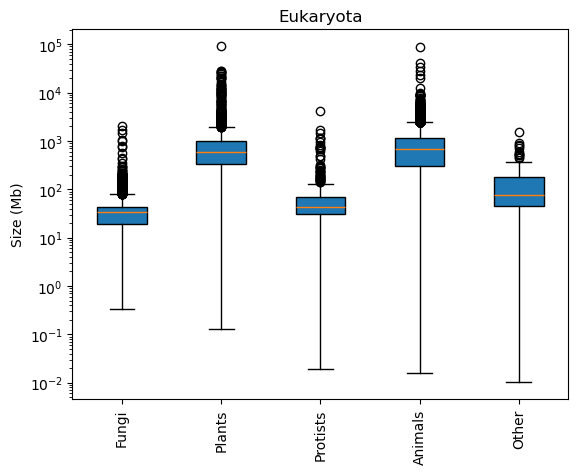

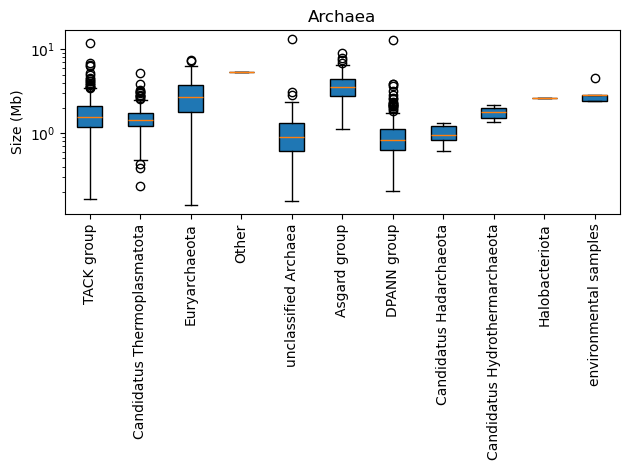

In [44]:
#Votre code ici
plt.close()

df["Size (Mb)"] = pd.to_numeric(df["Size (Mb)"], errors="coerce")

kingdoms = df["Kingdom"].unique()

for kingdom in kingdoms:
    subset = df[df["Kingdom"] == kingdom]
    groups = subset["Group"].unique()
    sizes = []
    for group in groups:
        q13 = subset[subset["Group"] == group]
        sizes.append(q13["Size (Mb)"].dropna())
    plt.figure()
    plt.boxplot(sizes,  tick_labels=groups, vert=True, patch_artist=True)
    plt.title(kingdom)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.ylabel("Size (Mb)")

plt.tight_layout()
plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [46]:
#Votre code ici
df.loc[df.groupby('Kingdom')["Size (Mb)"].idxmin()][['Kingdom', '#Organism/Name','Size (Mb)']]

,Kingdom,#Organism/Name,Size (Mb)
13060,Archaea,candidate division MSBL1 archaeon SCGC-AAA385M02,0.137797
7691,Bacteria,bacterium AG-323-L21,0.101587
33850,Eukaryota,Fragilariopsis kerguelensis,0.010223
38605,Viruses,Hippotragine gammaherpesvirus 1,0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [48]:
#Votre code ici
df.loc[df.groupby('Kingdom')["Size (Mb)"].idxmax()][['Kingdom', '#Organism/Name','Size (Mb)']]

,Kingdom,#Organism/Name,Size (Mb)
5108,Archaea,archaeon,13.3999
81774,Bacteria,Thiomonas,25.1426
85849,Eukaryota,Viscum album,91113.7000
84080,Viruses,uncultured virus,1150.6800


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

In [51]:
#Votre code ici
df["Chrs"] = pd.to_numeric(df["Chrs"], errors="coerce")

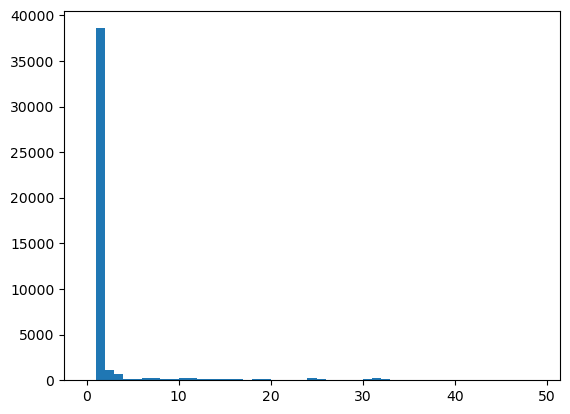

Chrs
1.0      38596
2.0       1084
3.0        682
4.0        180
5.0        152
         ...  
88.0         1
90.0         2
99.0         5
100.0        7
105.0        1
Length: 78, dtype: int64

In [52]:
plt.close()
q16 = df.groupby('Chrs').size()
plt.figure()
plt.hist(df["Chrs"], bins = range(50))
plt.show()
q16

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

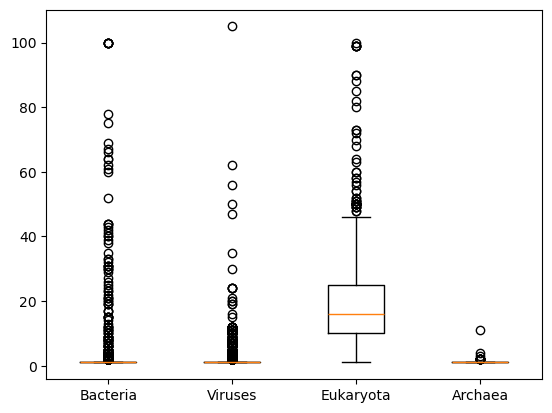

In [54]:
#Votre code ici
chrs = []
for kingdom in kingdoms:
    subset = df[df["Kingdom"] == kingdom]
    chrs.append(subset["Chrs"].dropna())

plt.close()
plt.figure()
plt.boxplot(chrs, tick_labels=kingdoms)
plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Une distribution plus étendue pour les eucaryotes. Beaucoup de valeurs aberrantes.

Bactéries et Archées : Ces organismes sont généralement procaryotes, avec un génome compact et un nombre de chromosomes très faible (souvent un seul chromosome circulaire).
Virus : Les virus possèdent des génomes extrêmement variés, mais la majorité ont un nombre de chromosomes faible (souvent un seul brin d'ADN ou d'ARN), d’où leur concentration autour de zéro. Cependant, certaines espèces virales complexes peuvent avoir plusieurs segments, expliquant les valeurs aberrantes.
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

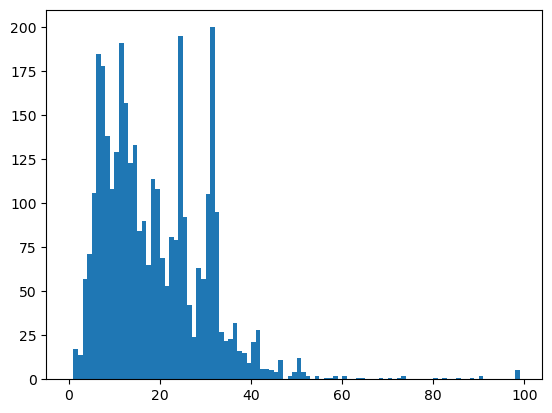

In [58]:
#Votre code ici
subset = df[df["Kingdom"] == "Eukaryota"]
plt.close()
plt.figure()
plt.hist(subset["Chrs"].dropna(), bins=range(100))
plt.show()


Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

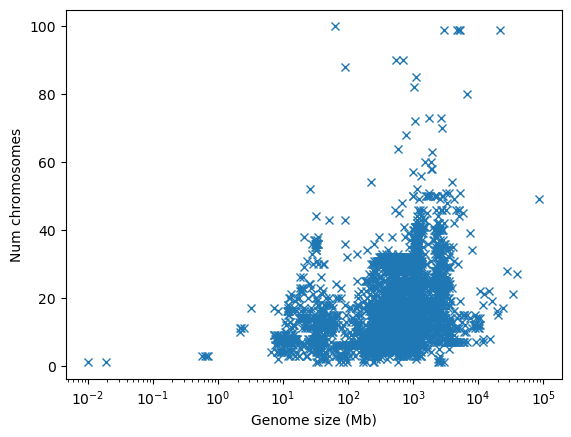

In [60]:
#Votre code ici

subset = df[df["Kingdom"] == "Eukaryota"][["Size (Mb)", "Chrs"]].copy().dropna()

plt.close()
plt.figure()
plt.plot(subset["Size (Mb)"], subset["Chrs"], "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("Num chromosomes")
plt.xscale("log")
plt.show()

Q21. Qu’observez-vous ?

```markdown
Il existe une tendance générale où un génome plus grand correspond souvent à un plus grand nombre de chromosomes.
Cependant, la relation n’est pas strictement linéaire et présente une grande variabilité.

Faible nombre de chromosomes pour les petits génomes.
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN circulaire distincte de l’ADN chromosomique principal d’un organisme.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

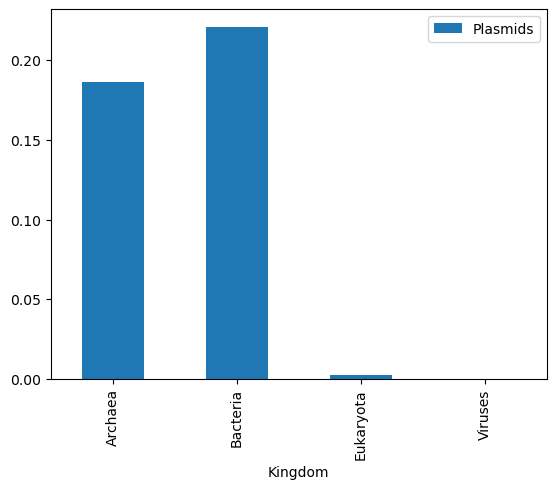

In [67]:
#Votre code ici

df["Plasmids"] = pd.to_numeric(df["Plasmids"], errors="coerce")

q23 = df[["Kingdom", "Plasmids"]].copy().fillna(0)
q23 = q23.groupby("Kingdom").mean()

plt.close()
q23.plot.bar()
plt.show()

Q24. Qu'observez-vous ?

```markdown
Les virus n'ont pas de plasmides dans cette database. Il y a beaucoup d'eucaryotes qui ne possedent pas de plasmides.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
projet de séquençage de génome
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

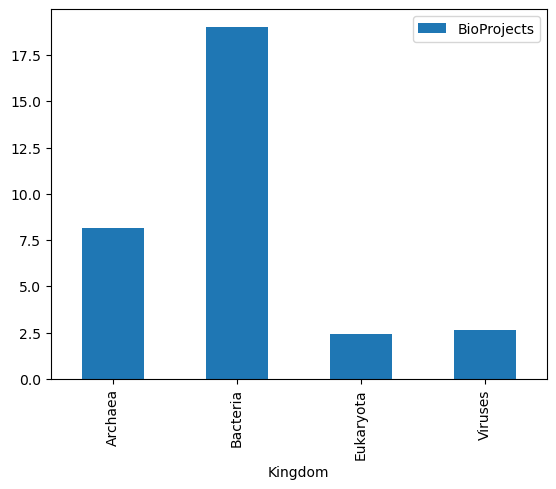

In [74]:
#Votre code ici
df["BioProjects"] = pd.to_numeric(df["BioProjects"], errors="coerce")

q26 = df[["Kingdom", "BioProjects"]].copy().dropna()
q26 = q26.groupby("Kingdom").mean()

plt.close()
q26.plot.bar()
plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [76]:
#Votre code ici
df["BioProjects"].isna().sum()

2

Q28. Combien d'organismes ont > 1 projets ?

In [78]:
#Votre code ici
df[df["BioProjects"] > 1]["BioProjects"].count()

18947

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [80]:
#Votre code ici
df.nlargest(5, 'BioProjects')

,#Organism/Name,Kingdom,Group,SubGroup,Size (Mb),Chrs,Organelles,Plasmids,BioProjects
29710,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,5.59460,3.0,-,18.0,39907.0
41700,Klebsiella pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,5.68232,2.0,-,13.0,21229.0
75957,Staphylococcus aureus,Bacteria,Terrabacteria group,Bacillota,2.82136,1.0,-,10.0,17228.0
70775,Salmonella enterica,Bacteria,Pseudomonadota,Gammaproteobacteria,4.95138,100.0,-,9.0,16613.0
83689,uncultured Lachnospiraceae bacterium,Bacteria,Terrabacteria group,Bacillota,7.69547,NaN,-,NaN,15909.0


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Ces bactéries sont souvent associées à des maladies humaines et animales.
Ces bactéries sont faciles à cultiver en laboratoire, ont un temps de génération court et sont bien caractérisées génétiquement.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
bases azotées (guanine ou cytosine) dans l'ADN soumis à l'assemblage. 
les régions chromosomiques riches en GC sont en moyenne enrichies en gènes, et les gènes sont alors plus compacts.
L'étude du taux de GC est très utilisée en bactériologie pour la taxonomie.
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [103]:
#Votre code ici
df3 = pd.read_csv('assembly_summary_genbank_historical.txt', sep='\t', skiprows=1, index_col=False, dtype=str)
df3.columns

Index(['#assembly_accession', 'bioproject', 'biosample', 'wgs_master',
       'refseq_category', 'taxid', 'species_taxid', 'organism_name',
       'infraspecific_name', 'isolate', 'version_status', 'assembly_level',
       'release_type', 'genome_rep', 'seq_rel_date', 'asm_name',
       'asm_submitter', 'gbrs_paired_asm', 'paired_asm_comp', 'ftp_path',
       'excluded_from_refseq', 'relation_to_type_material',
       'asm_not_live_date', 'assembly_type', 'group', 'genome_size',
       'genome_size_ungapped', 'gc_percent', 'replicon_count',
       'scaffold_count', 'contig_count', 'annotation_provider',
       'annotation_name', 'annotation_date', 'total_gene_count',
       'protein_coding_gene_count', 'non_coding_gene_count', 'pubmed_id'],
      dtype='object')

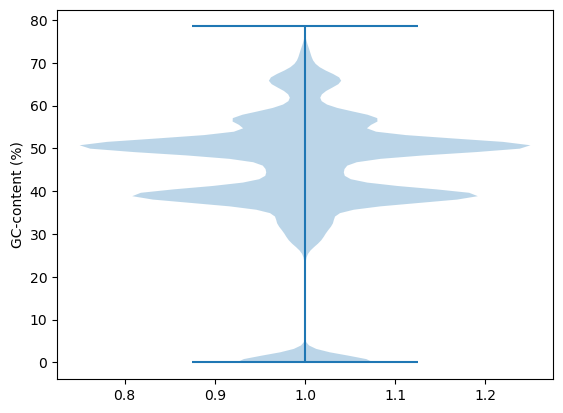

In [90]:

df3["gc_percent"] = pd.to_numeric(df3["gc_percent"], errors="coerce")
df3[(df3["gc_percent"]<0) | (df3["gc_percent"]>100)]["gc_percent"] = np.nan

plt.close()
plt.violinplot(df3["gc_percent"].dropna())
plt.ylabel("GC-content (%)")
plt.show()

Q4. Qu'observez-vous ?

```markdown
Le GC content est plutot bien reparti, aux alentours de 50%.
Meme s'il existe des genes avec 0% de GC content, il le gc content ne depasse pas 50%.
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

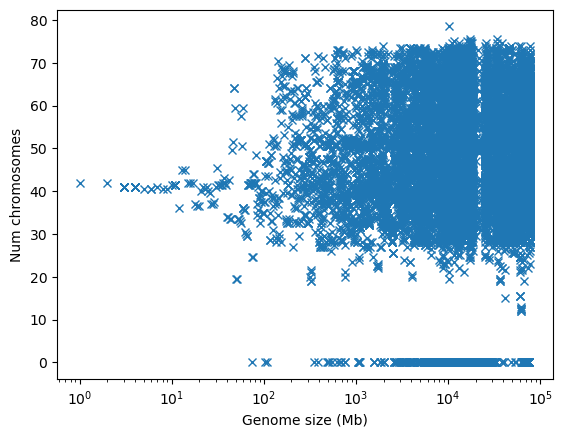

In [94]:
#Votre code ici

subset = df3[["genome_size", "gc_percent"]].copy().dropna()

plt.close()
plt.figure()
plt.plot(subset["genome_size"], subset["gc_percent"], "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("Num chromosomes")
plt.xscale("log")
plt.show()

Q6. Qu'observez-vous ?

```markdown
On retrouve la distribution du violon plot. Il y a plus de diversite dans les genome de grande taille.
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [119]:
#Votre code ici
df3.loc[df3["total_gene_count"] == "na", ["total_gene_count"]] = np.nan

plt.close()
plt.figure()
plt.boxplot(df3["total_gene_count"].dropna())
plt.show()


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Q8. Qu'observez-vous ?

```markdown
Tres proche de zero.
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

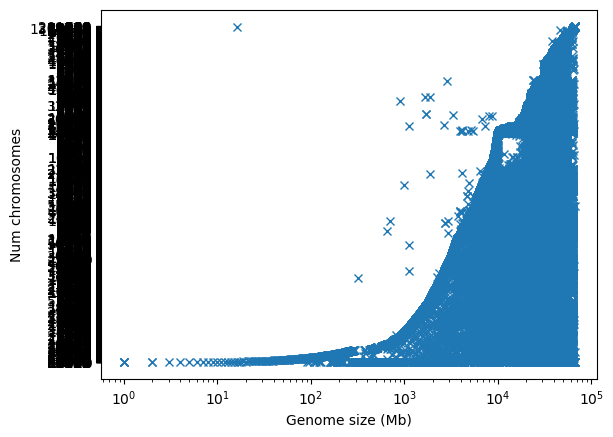

In [121]:
#Votre code ici
subset = df3[["genome_size", "total_gene_count"]].copy().dropna()

plt.close()
plt.figure()
plt.plot(subset["genome_size"], subset["total_gene_count"], "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("Num chromosomes")
plt.xscale("log")
plt.show()


# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici